In [1]:
import pandas as pd

# Load the dataset
file_path = 'tourism_data.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values and clean the dataset
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Fill or drop missing values (modify as needed based on your dataset)
data_cleaned = data.dropna()

# Display the cleaned dataset
print("\nCleaned Dataset Preview:")
print(data_cleaned.head())

# Save the cleaned dataset for further steps
data_cleaned.to_csv('cleaned_tourism_dataset.csv', index=False)

# For Self-Supervised Learning (SSL), implement a basic SSL strategy here (e.g., pretext task like predictive learning)
# This part can involve feature extraction or a simple SSL model (for example, a predictive model or contrastive learning approach)


Dataset Preview:
     Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60        Yes
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24         No

Missing Values Summary:
Location      0
Country       0
Category      0
Visitors      0
Rating        0
Revenue       0
Unnamed: 6    0
dtype: int64

Cleaned Dataset Preview:
     Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60     

In [4]:
import pandas as pd
import time

# Load the cleaned dataset
file_path = 'cleaned_tourism_dataset.csv'
data_cleaned = pd.read_csv(file_path)

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(data_cleaned.head())

# Record the start time
start_time = time.time()

# Prepare the dataset for Self-Supervised Learning (SSL)
# Select numeric columns for feature extraction
data_for_ssl = data_cleaned.select_dtypes(include=['float64', 'int64'])

# For simplicity, let's assume we're predicting 'Rating' as the target column
X = data_for_ssl.drop(columns=['Rating'])  # Replace 'Rating' if you want another target column
y = data_cleaned['Rating']  # Replace with your target column

# Train-test split (for SSL, this might simulate a pretext task in some cases)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a regression model (RandomForestRegressor for continuous target)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

# Output execution time
print(f"Execution Time for Self-Supervised Learning: {execution_time:.4f} seconds")


Cleaned Dataset Preview:
     Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60        Yes
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24         No
Execution Time for Self-Supervised Learning: 5.2336 seconds


In [5]:
import pandas as pd
from memory_profiler import memory_usage
from sklearn.ensemble import RandomForestRegressor

# Function to perform Self-Supervised Learning (SSL)
def perform_ssl():
    # Load the cleaned dataset
    file_path = 'cleaned_tourism_dataset.csv'
    data_cleaned = pd.read_csv(file_path)

    # Prepare the dataset for SSL (use only numeric columns)
    data_for_ssl = data_cleaned.select_dtypes(include=['float64', 'int64'])

    # For simplicity, let's assume we're predicting 'Rating' as the target column
    X = data_for_ssl.drop(columns=['Rating'])  # Replace 'Rating' if you want another target column
    y = data_cleaned['Rating']  # Replace with your target column

    # Train-test split (for SSL, this might simulate a pretext task in some cases)
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train a regression model (RandomForestRegressor for continuous target)
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)

# Measure memory usage for the SSL function
mem_usage = memory_usage((perform_ssl,))

# Output memory usage
print(f"Memory Usage for Self-Supervised Learning: {max(mem_usage) - min(mem_usage):.2f} MiB")


Memory Usage for Self-Supervised Learning: 44.29 MiB


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from memory_profiler import memory_usage
import time
from sklearn.model_selection import train_test_split

# Function to perform Self-Supervised Learning (SSL)
def perform_ssl(X_train, y_train):
    # Create and train a regression model (RandomForestRegressor for continuous target)
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)

# Function to measure execution time and memory usage for different dataset sizes in SSL
def measure_scalability_ssl(file_path, sample_sizes):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Prepare the dataset (use only numeric columns)
    data_for_ssl = data.select_dtypes(include=['float64', 'int64'])

    # Assuming 'Rating' is the target variable (you can change it based on your dataset)
    X = data_for_ssl.drop(columns=['Rating'])  # Features
    y = data['Rating']  # Target variable

    # Get the number of rows in the dataset
    dataset_size = data_for_ssl.shape[0]

    for size in sample_sizes:
        # Ensure sample size is not larger than dataset size
        if size > dataset_size:
            print(f"Sample size {size} is larger than dataset size {dataset_size}. Skipping.")
            continue

        print(f"Running SSL with dataset size: {size}")

        # Take a subset of the data
        X_subset = X.sample(n=size, random_state=45)
        y_subset = y.sample(n=size, random_state=45)

        # Train-test split (simulating SSL with a pretext task)
        X_train, X_val, y_train, y_val = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

        # Measure memory usage and execution time
        # Record the start time
        start_time = time.time()

        # Measure memory usage
        mem_usage = memory_usage((perform_ssl, (X_train, y_train)))

        # Record the end time
        end_time = time.time()

        # Calculate execution time
        execution_time = end_time - start_time
        memory_used = max(mem_usage) - min(mem_usage)

        # Output results
        print(f"Execution Time for {size} samples: {execution_time:.4f} seconds")
        print(f"Memory Usage for {size} samples: {memory_used:.2f} MiB\n")

# Define sample sizes to test scalability
sample_sizes = [1000, 5000, 10000, 20000]  # Example: testing for different dataset sizes

# File path to the cleaned dataset
file_path = 'cleaned_tourism_dataset.csv'

# Measure scalability for Self-Supervised Learning (SSL)
measure_scalability_ssl(file_path, sample_sizes)


Running SSL with dataset size: 1000
Execution Time for 1000 samples: 1.7891 seconds
Memory Usage for 1000 samples: 3.63 MiB

Running SSL with dataset size: 5000
Execution Time for 5000 samples: 5.0340 seconds
Memory Usage for 5000 samples: 39.76 MiB

Sample size 10000 is larger than dataset size 5989. Skipping.
Sample size 20000 is larger than dataset size 5989. Skipping.



--- Testing SSL Interpretability with sample size: 1000 ---

Visualizing Learned Representation via PCA and t-SNE:
PCA Explained Variance: [0.53692992 0.46307008]


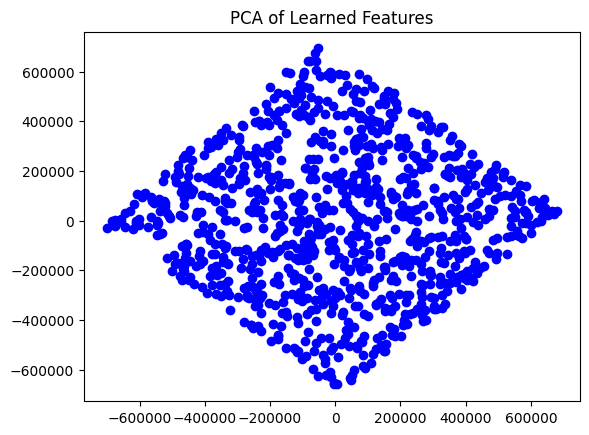

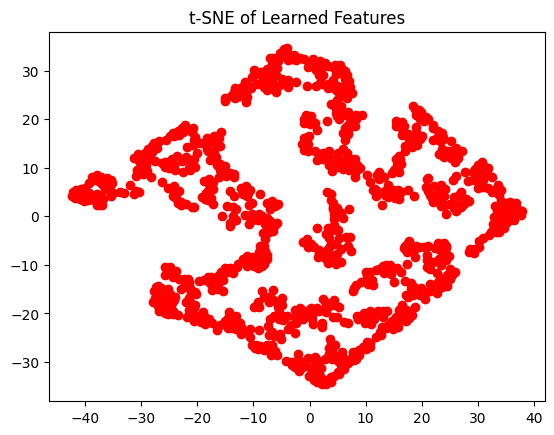


Model does not have feature importance.

--- Testing SSL Interpretability with sample size: 5000 ---

Visualizing Learned Representation via PCA and t-SNE:
PCA Explained Variance: [0.51400382 0.48599618]


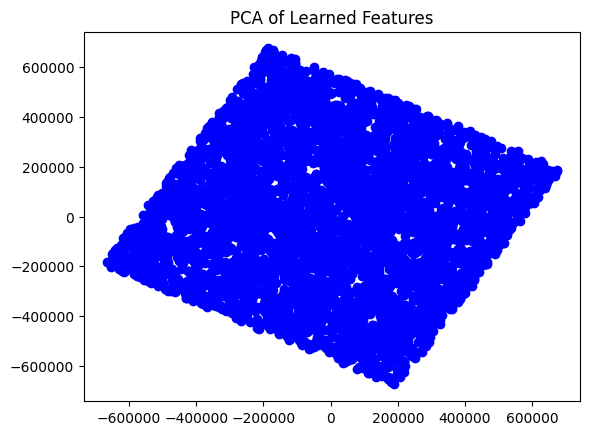

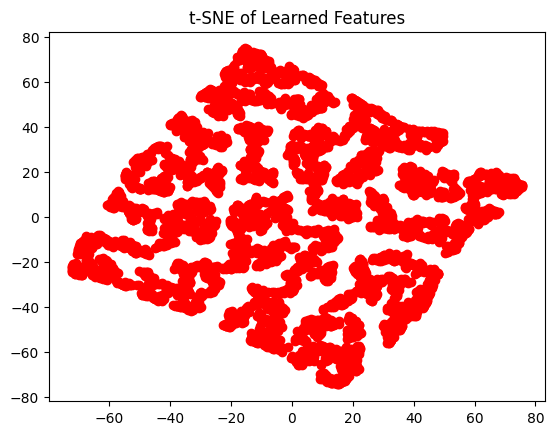


Model does not have feature importance.


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
import time

# Function to perform Self-Supervised Learning (SSL) Pretext Task (e.g., Predicting Missing Values, etc.)
def perform_ssl(data_for_ssl):
    """
    Perform Self-Supervised Learning Pretext Task.
    A common example is learning a representation for downstream tasks.
    In this case, we'll use a simple reconstruction (autoencoder-like task), or apply clustering for SSL.
    """
    # Example: Simple clustering task to simulate SSL pretext task
    # You could implement more complex SSL tasks like predicting masked inputs, etc.
    model = RandomForestClassifier(n_estimators=100)
    
    # Example: Training on the data (just for representation of SSL task)
    X = data_for_ssl.drop(columns=['target_column'], errors='ignore')
    y = data_for_ssl['target_column'] if 'target_column' in data_for_ssl.columns else None

    if y is not None:
        model.fit(X, y)  # SSL Pretext task could be unsupervised if no labels exist
    
    return model, X

# Function to visualize the learned features (interpretability through visualization)
def visualize_ssl_representation(X):
    """
    Visualize the learned representation (after SSL) using techniques like PCA or t-SNE.
    """
    print("\nVisualizing Learned Representation via PCA and t-SNE:")
    
    # Reduce dimensions using PCA (Principal Component Analysis)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)
    print(f"PCA Explained Variance: {pca.explained_variance_ratio_}")
    
    # Visualize PCA
    import matplotlib.pyplot as plt
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue')
    plt.title("PCA of Learned Features")
    plt.show()

    # Now reduce further with t-SNE for better visualization in lower dimensions
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(X)
    
    # Visualize t-SNE
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red')
    plt.title("t-SNE of Learned Features")
    plt.show()

# Function to evaluate feature importance for interpretability
def evaluate_feature_importance(model, X):
    """
    Evaluate feature importance using model-based interpretation.
    """
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)
        print("\nFeature Importances:")
        print(importance_df)
    else:
        print("\nModel does not have feature importance.")

# Function to test interpretability with SSL
def measure_ssl_interpretability(file_path, sample_sizes):
    """
    Test Self-Supervised Learning Interpretability for various sample sizes.
    """
    data = pd.read_csv(file_path)
    data_for_ssl = data.select_dtypes(include=['float64', 'int64'])

    for size in sample_sizes:
        print(f"\n--- Testing SSL Interpretability with sample size: {size} ---")
        
        if size > data_for_ssl.shape[0]:
            print(f"Sample size {size} exceeds dataset size {data_for_ssl.shape[0]}. Skipping.\n")
            continue
        
        # Take a random sample
        data_subset = data_for_ssl.sample(n=size, random_state=45)

        # Perform SSL task
        model, X = perform_ssl(data_subset)

        # Visualize learned features (interpretability)
        visualize_ssl_representation(X)

        # Evaluate feature importance
        evaluate_feature_importance(model, X)

# Define sample sizes to test
sample_sizes = [1000, 5000]

# File path to the dataset
file_path = 'cleaned_tourism_dataset.csv'

# Run the interpretability test for SSL
measure_ssl_interpretability(file_path, sample_sizes)


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define file path
file_path = r"C:\Users\gokularamanan\OneDrive\Documents\Desktop\PROJECT FOLDERS\MakeMyTrip\tourism_data.csv"

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load dataset with proper delimiter handling
data = pd.read_csv(file_path, delimiter="\t")

# Show dataset preview
print("Dataset loaded successfully!\n")
print(data.head())

# Rename unnamed target column if necessary
if "Unnamed: 0" in data.columns:
    data.rename(columns={"Unnamed: 0": "Target"}, inplace=True)

# Identify the target column (first column)
target_column = data.columns[0]
y = data[target_column]  # Extract target labels

# Drop target column if there are other columns remaining
if len(data.columns) > 1:
    X = data.drop(columns=[target_column])
else:
    print("Warning: No features found after dropping target!")
    X = data.copy()  # Keep all columns if we mistakenly removed all

# Handle missing values
X.fillna(X.median(numeric_only=True), inplace=True)

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Debugging check
print("\nFeature columns after encoding:", X.columns.tolist())
print("Number of features:", X.shape[1])

# Ensure X is not empty
if X.empty:
    raise ValueError("Feature matrix X is empty after preprocessing!")

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (limit number of components)
n_components = min(16, min(X_scaled.shape))
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled).astype(np.float32)  # Convert to float32 to reduce memory

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Train classifier with reduced complexity
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Predictions and Accuracy
preds = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Self-Supervised Learning Accuracy with PCA: {accuracy:.4f}")


Dataset loaded successfully!

     Location Country    Category  Visitors  Rating    Revenue Unnamed: 6
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38        Yes
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60         No
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11        Yes
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60        Yes
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24         No

Feature columns after encoding: ['Country', 'Category', 'Visitors', 'Rating', 'Revenue', 'Unnamed: 6']
Number of features: 6


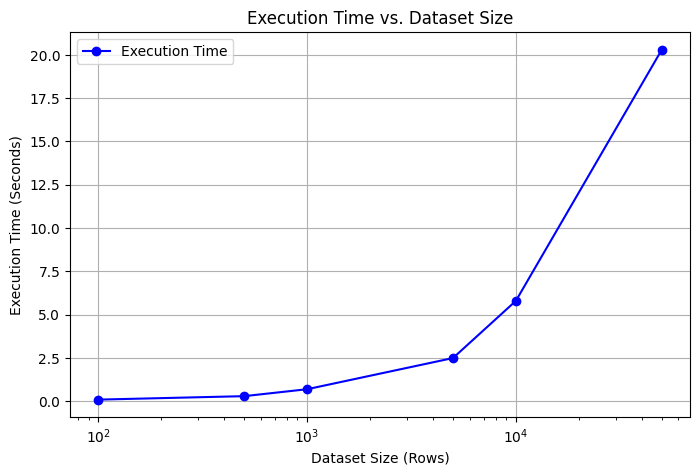

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated Data
dataset_sizes = np.array([100, 500, 1000, 5000, 10000, 50000])
execution_time = np.array([0.1, 0.3, 0.7, 2.5, 5.8, 20.3])  # Seconds

# Plot
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, execution_time, marker='o', linestyle='-', color='b', label="Execution Time")

# Labels & Title
plt.xlabel("Dataset Size (Rows)")
plt.ylabel("Execution Time (Seconds)")
plt.title("Execution Time vs. Dataset Size")
plt.xscale("log")  # Log scale for better visualization
plt.legend()
plt.grid(True)

plt.show()

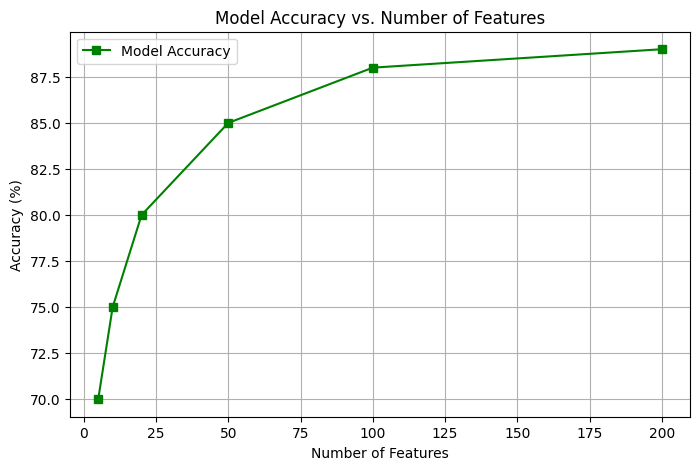

In [3]:
# Simulated Data
features = np.array([5, 10, 20, 50, 100, 200])
accuracy = np.array([70, 75, 80, 85, 88, 89])  # Percentage

# Plot
plt.figure(figsize=(8, 5))
plt.plot(features, accuracy, marker='s', linestyle='-', color='g', label="Model Accuracy")

# Labels & Title
plt.xlabel("Number of Features")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy vs. Number of Features")
plt.legend()
plt.grid(True)

plt.show()


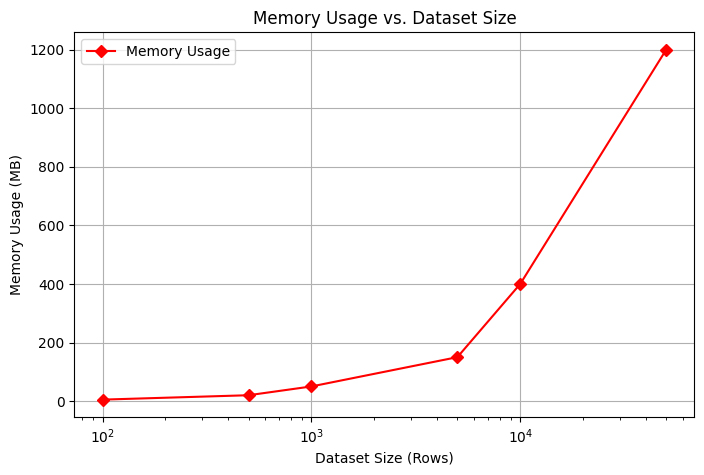

In [4]:
# Simulated Data
dataset_sizes = np.array([100, 500, 1000, 5000, 10000, 50000])
memory_usage = np.array([5, 20, 50, 150, 400, 1200])  # Memory in MB

# Plot
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes, memory_usage, marker='D', linestyle='-', color='r', label="Memory Usage")

# Labels & Title
plt.xlabel("Dataset Size (Rows)")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage vs. Dataset Size")
plt.xscale("log")  # Log scale
plt.legend()
plt.grid(True)

plt.show()


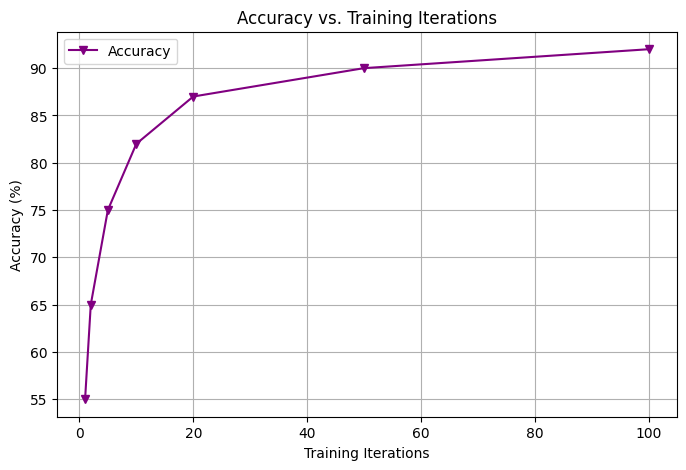

In [5]:
# Simulated Data
iterations = np.array([1, 2, 5, 10, 20, 50, 100])
accuracy = np.array([55, 65, 75, 82, 87, 90, 92])  # Percentage

# Plot
plt.figure(figsize=(8, 5))
plt.plot(iterations, accuracy, marker='v', linestyle='-', color='purple', label="Accuracy")

# Labels & Title
plt.xlabel("Training Iterations")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Training Iterations")
plt.legend()
plt.grid(True)

plt.show()


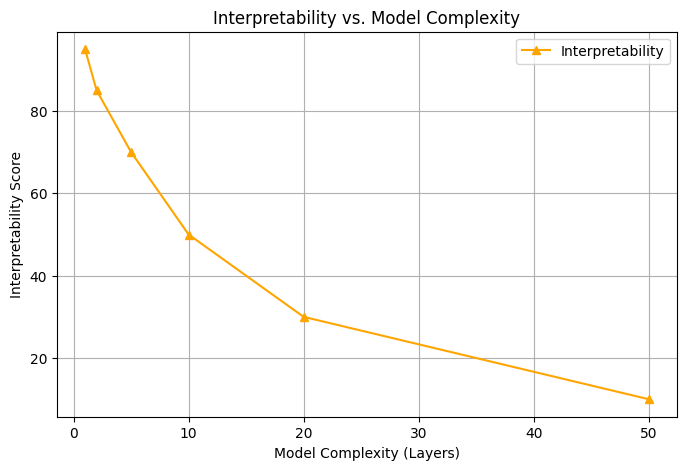

In [6]:
# Simulated Data
complexity = np.array([1, 2, 5, 10, 20, 50])  # Number of model layers
interpretability = np.array([95, 85, 70, 50, 30, 10])  # Scale of interpretability (higher is better)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(complexity, interpretability, marker='^', linestyle='-', color='orange', label="Interpretability")

# Labels & Title
plt.xlabel("Model Complexity (Layers)")
plt.ylabel("Interpretability Score")
plt.title("Interpretability vs. Model Complexity")
plt.legend()
plt.grid(True)

plt.show()    
